In [12]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from numpy import random
%matplotlib inline

In [5]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
mnist.train.images.shape

(55000, 784)

In [10]:
mnist.train.images[0:5, 0:5]

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [11]:
mnist.train.labels.shape

(55000, 10)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


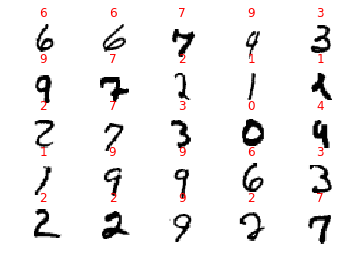

In [13]:
def _to_number(label):
    for index, n in enumerate(label):
        if n != 0:
            return index

def main():
    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
    X = mnist.train.images
    y = mnist.train.labels

    # データの中から 25 点を無作為に選び出す
    p = random.random_integers(0, len(X), 25)

    # 選んだデータとラベルを matplotlib で表示する
    samples = np.array(list(zip(X, y)))[p]
    for index, (data, label) in enumerate(samples):
        # 画像データを 5x5 の格子状に配置する
        plt.subplot(5, 5, index + 1)
        # 軸に関する表示はいらない
        plt.axis('off')
        # データを 8x8 のグレースケール画像として表示する
        plt.imshow(data.reshape(28, 28), cmap=cm.gray_r, interpolation='nearest')
        n = _to_number(label)
        # 画像データのタイトルに正解ラベルを表示する
        plt.title(n, color='red')
    # グラフを表示する
    plt.show()

if __name__ == '__main__':
    main()

In [16]:
x = tf.placeholder(tf.float32, [None, 784])
print x

Tensor("Placeholder_1:0", shape=(?, 784), dtype=float32)


In [19]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
print W
print b

In [22]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [23]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [24]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

In [25]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [27]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [28]:
for _ in range(1000):
   batch_xs, batch_ys = mnist.train.next_batch(100)
   sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [29]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [30]:
print correct_prediction

Tensor("Equal:0", shape=(?,), dtype=bool)


In [32]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print accuracy

Tensor("Mean_1:0", shape=(), dtype=float32)


In [35]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9109


In [36]:
f = tf.argmax(y, 1)
sess.run(f, feed_dict={x: [mnist.test.images[0]]})

array([7])

In [37]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [38]:
f = y
sess.run(f, feed_dict={x: [mnist.test.images[0]]})

array([[  4.35010916e-05,   4.13799994e-10,   1.88551145e-04,
          2.96521024e-03,   4.57261706e-07,   1.16370948e-05,
          9.66563052e-10,   9.96356130e-01,   3.20280242e-06,
          4.31217108e-04]], dtype=float32)